# Advent of Code 2025

## Day 09

https://adventofcode.com/2025/day9

### Part 1

In [1]:
from collections import defaultdict
import time
from plotly import graph_objects as go
import numpy as np
from collections import deque

day = 9

test_result = 50
test_data = """\
7,1
11,1
11,7
9,7
9,5
2,5
2,3
7,3
"""

data = [[int(x) for x in line.split(",")] for line in test_data.split("\n")[:-2]]
data


[[7, 1], [11, 1], [11, 7], [9, 7], [9, 5], [2, 5], [2, 3]]

In [2]:
def solution1(data):
    data = [[int(x) for x in line.split(",")] for line in data.split("\n")[:-2]]
        
    output = 0
    for i, (x0, y0) in enumerate(data):
        for x1, y1 in data[i+1:]:
            area = (abs(x1-x0)+1) * (abs(y1-y0)+1)
            #print(x0, y0, x1, y0, area)
            output = max(output, area)
            #print(output)
    return output

sol1 = solution1(test_data)
print(sol1)
assert sol1 == test_result
print("test passed")

50
test passed


In [3]:
with open(f"day{day:02d}.txt") as f:
    inp_data = f.read()

sol1 = solution1(inp_data)
print(sol1)
assert sol1 == 4763040296
print("test passed")

4763040296
test passed


### Part 2

In [4]:
test_result2 = 24

elapsed time for map: 0.01s
elapsed time for validy check: 0.00s
elapsed time overall (without optional plot): 0.01s


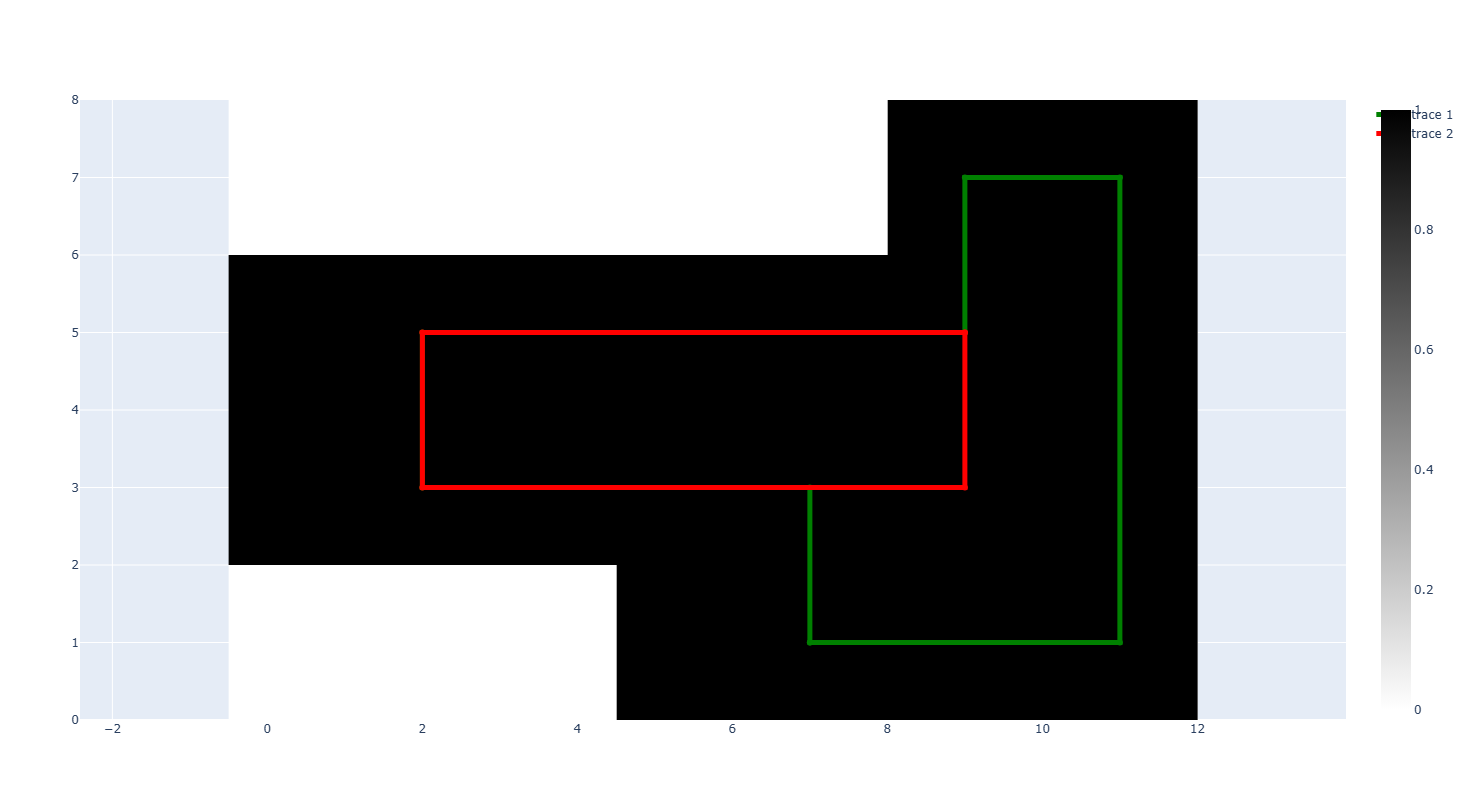

best rectangle: [(9, 5), (2, 5), (2, 3), (9, 3), (9, 5)] (area: 24)
24
test passed


In [5]:
def floodFill(img: np.ndarray, sr: int, sc: int) -> np.ndarray:
    # adapted from https://www.geeksforgeeks.org/dsa/flood-fill-algorithm/
    # If the starting pixel already has the new color
    if img[sr, sc] == True:
        return img

    q = deque()
    q.append((sr, sc))
    
    # Change the color of the starting pixel
    img[sr, sc] = True
    

    # Perform BFS
    count = 0
    while q:
        r, c = q.popleft()

        # Traverse all 4 directions
        for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:#, (1, 1), (-1, 1), (-1, -1), (1, -1)]:
            nr = r + dr
            nc = c + dc            

            # Check boundary conditions and color match
            if 0 <= nc < img.shape[1] and 0 <= nr < img.shape[0]:
                if img[nr, nc] == False:
                    count += 1
                    img[nr, nc] = True
                    q.append((nr, nc))

    return img

def solution2(data, plot = True):
    t0 = time.time()
    points = [[int(x) for x in line.split(",")] for line in data.split("\n")[:-1]]
    
    x = np.array([p[0] for p in points])
    y = np.array([p[1] for p in points])

    # compressed map of only occuring coordinates
    coord_x = np.sort(np.unique(x))
    coord_y = np.sort(np.unique(y))
    cols = len(coord_x)
    rows = len(coord_y)
    
    M = np.zeros((rows, cols), dtype="bool")
    X, Y = np.meshgrid(coord_x, coord_y)
    
    # paint outline (all points connected to following)
    for i in range(len(points)):
        x1 = x[i]
        x2 = x[(i+1)%len(x)]
        x1, x2 = sorted([x1, x2])
        y1 = y[i]
        y2 = y[(i+1)%len(x)]
        y1, y2 = sorted([y1, y2])    
        
        M[ (x1<=X) & (X<=x2) & (y1<=Y) & (Y<=y2)] = True
    
    # fill outline (hard coded start point)    
    if M.size < 100:
        sr, sc = 1, 2         
    else:
        sr, sc = 180, 130
        
    M = floodFill(M.copy(), sr, sc)
    t1 = time.time()
    print(f"elapsed time for map: {t1-t0:.2f}s")

    # cycle through all possible rectangles, check validity and find largest
    best = []
    output = 0
    
    for i, (x1, y1) in enumerate(points[:-1]):
        for (x2, y2) in points[i+1:]:
            if x1 == x2 or y1 == y2:
                continue        
            _y = sorted([y1, y2])
            _x = sorted([x1, x2])
            idx = (_x[0] <= X) & (X <= _x[1])
            idx &= (_y[0] <= Y) & (Y <= _y[1])
            
            valid = np.all(M[idx])
            
            if valid:
                area = (abs(x1-x2) + 1) * (abs(y1-y2) + 1)
                if area > output:
                    output = area
                    best = [(x1, y1), (x2, y1), (x2, y2), (x1, y2)] 
                    best += [best[0]]
    t2 = time.time()
    print(f"elapsed time for validy check: {t2-t1:.2f}s")
    print(f"elapsed time overall (without optional plot): {t2-t0:.2f}s")
    
    if plot:
        fig = go.Figure(
            go.Heatmap(
                x=coord_x, y=coord_y, 
                z=np.asarray(M, dtype="int"), 
                colorscale=[[0, "white"], [1, "black"]]
            )
        )        
        
        points += [points[0]]
        fig.add_trace(
            go.Scatter(
                x=[p[0] for p in points], y=[p[1] for p in points], 
                line=dict(color="green", width=5)
            )
        )
        fig.add_trace(
            go.Scatter(
                x=[p[0] for p in best], y=[p[1] for p in best], 
                line=dict(color="red", width=5)
            )
        )
        fig.update_layout(yaxis_scaleanchor="x", width=800, height=800)
        fig.show()
    print(f"best rectangle: {best} (area: {output})")
    
    return output
    
sol2 = solution2(test_data, plot=True)
print(sol2)

assert sol2 == test_result2
print("test passed")

elapsed time for map: 0.14s
elapsed time for validy check: 12.96s
elapsed time overall (without optional plot): 13.10s


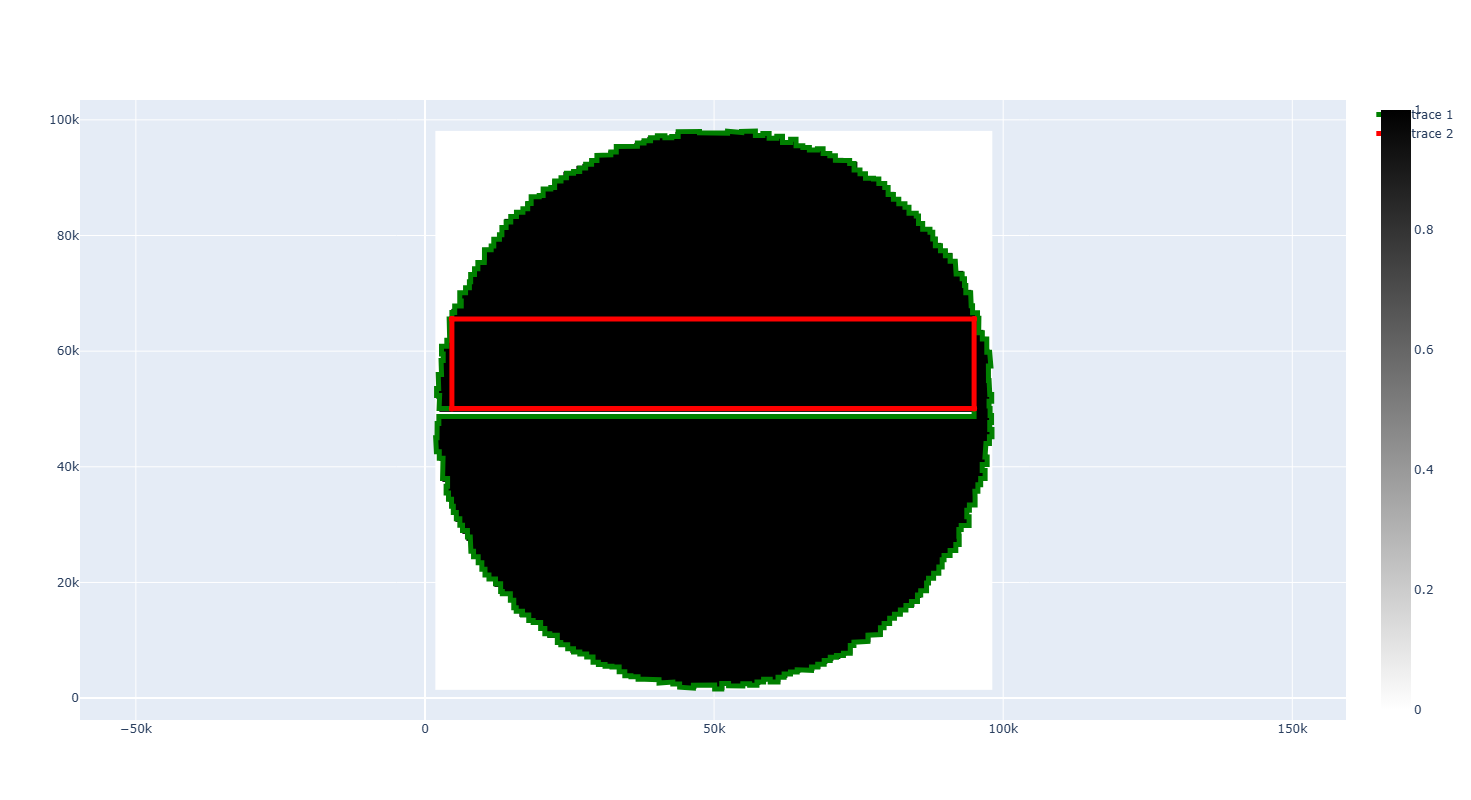

best rectangle: [(4658, 65554), (94969, 65554), (94969, 50092), (4658, 50092), (4658, 65554)] (area: 1396494456)
1396494456
test passed


In [6]:
with open(f"day{day:02d}.txt") as f:
    inp_data = f.read()

sol2 = solution2(inp_data, True)
print(sol2)

assert sol2 == 1396494456
print("test passed")